# PCA (Principal Component Analysis)
- Apresentar o dataset iris utilizando somente 2 variáveis é a melhor opção?
<br><img src="https://drive.google.com/uc?id=13xzXK-VzjNS81Clh0efUzeiOsuv1BZm-" style='width: 700px;' /><br>
- https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA
- Análise de Componentes Principais
- Técnica **não supervisionada** de **redução de dimensionalidade** através de combinações lineares dos recursos (features)
- **Variáveis relacionadas** (com relação entre si) são reduzidas a um número menor de **componentes não relacionados**
    - O primeiro componente principal tenta explicar o máximo da variância dos dados
        - O segundo tenta explicar o máximo da variância não explicada pelo primeiro
            - O terceiro, a variância não explicada pelo primeiro nem pelo segundo
                - O quarto...
- Facilita a visualização em problemas de clusterização, viabiliza análises em casos com muitas variáveis, melhora os modelos, etc.
- **IMPORTANTE:** os dados devem estar padronizados!

In [1]:
# Importando o pandas
import pandas as pd

In [2]:
# Considerando os mesmos dados que utilizamos no início desse módulo
dados = pd.DataFrame({
     'x': [1,2,3,2,7,8,6,7],
     'y': [2,1,2,3,6,6,7,8],
     'target': [0,0,0,0,1,1,1,1]
 })

X_dados = dados[['x','y']]

In [3]:
X_dados.mean()

x    4.500
y    4.375
dtype: float64

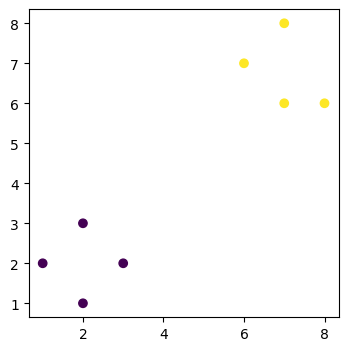

In [4]:
# Podemos exibir esses dados
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4,4))

ax.scatter(dados.x,dados.y,c=dados.target)

plt.show()

- **Para começarmos, vamos importar o PCA**
    - https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA

In [5]:
# Importando o PCA
from sklearn.decomposition import PCA

In [6]:
# Considerando para 2 componentes
pca = PCA(n_components=2)

In [7]:
# Fazendo o fit com os dados
pca = pca.fit(X_dados)

In [8]:
# Verificando a média
pca.mean_

array([4.5  , 4.375])

In [9]:
# Podemos deslocar todos os pontos em relação a media
dados['x_desl'] = dados.x - pca.mean_[0]
dados['y_desl'] = dados.y - pca.mean_[1]

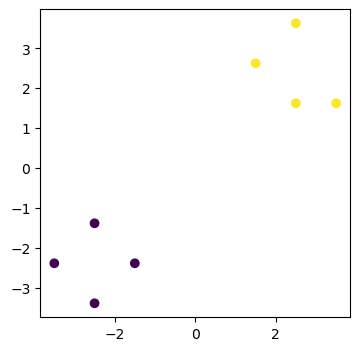

In [10]:
# E então traçar esse novo gráfico
fig, ax = plt.subplots(figsize=(4,4))

# ax.scatter(dados.x,dados.y,c=dados.target,alpha=0.1)
ax.scatter(dados.x_desl,dados.y_desl,c=dados.target)

plt.show()

In [11]:
# Agora visualizando os componentes
pca.components_

array([[ 0.72260337,  0.69126288],
       [ 0.69126288, -0.72260337]])

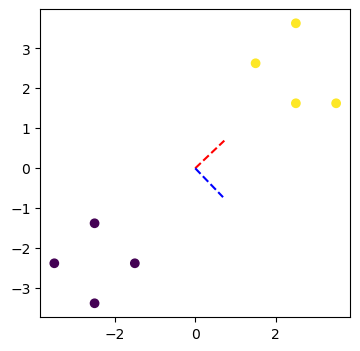

In [12]:
# Podemos traçar graficamente
# E então traçar esse novo gráfico
fig, ax = plt.subplots(figsize=(4,4))

# ax.scatter(dados.x,dados.y,c=dados.target,alpha=0.1)
ax.scatter(dados.x_desl,dados.y_desl,c=dados.target)
ax.plot([0,pca.components_[0][0]],[0,pca.components_[0][1]],'--r')
ax.plot([0,pca.components_[1][0]],[0,pca.components_[1][1]],'--b')
# ax.plot([pca.components_[0][0]*(-5),pca.components_[0][0]*5],[pca.components_[0][1]*(-5),pca.components_[0][1]*5],'r')

plt.show()

In [13]:
# Verificando o quanto esses componentes explicam a variância dos nossos dados
pca.explained_variance_ratio_

array([0.94809356, 0.05190644])

In [14]:
# Visualizando a transformação
pca.transform(X_dados)

array([[-4.17086114, -0.70323705],
       [-4.13952064,  0.7106292 ],
       [-2.72565439,  0.6792887 ],
       [-2.75699489, -0.73457755],
       [ 2.92981061,  0.55392671],
       [ 3.65241398,  1.24518958],
       [ 2.89847011, -0.85993954],
       [ 4.31233636, -0.89128004]])

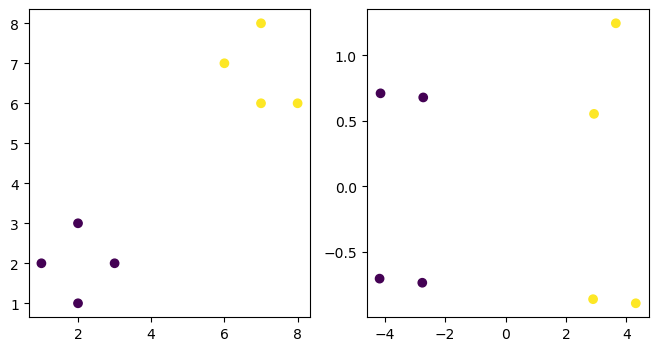

In [15]:
# E plotando essa transformação graficamente
fig, ax = plt.subplots(ncols=2,figsize=(8,4))

ax[0].scatter(dados.x,dados.y,c=dados.target)
ax[1].scatter(pca.transform(X_dados)[:,0],pca.transform(X_dados)[:,1],c=dados.target)

plt.show()

- **E se nossos dados estivessem em 3 dimensões?**

In [16]:
# Considerando os novos dados
dados2 = pd.DataFrame({
     'x': [1,2,3,2,7,8,6,7],
     'y': [2,1,2,3,6,6,7,8],
     'z': [1,2,1,2,7,8,8,7],
     'target': [0,0,0,0,1,1,1,1]
 })

X_dados2 = dados2[['x','y','z']]

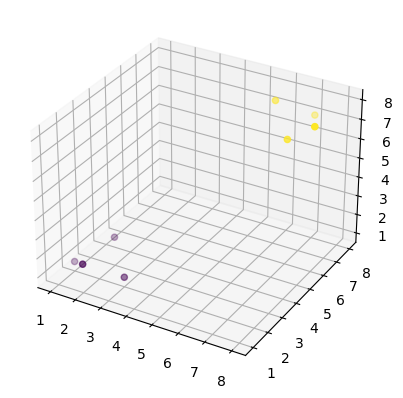

In [17]:
# Visualizando graficamente
ax = plt.figure().add_subplot(projection='3d')

ax.scatter(dados2.x,dados2.y,dados2.z,c=dados.target)

plt.show()

In [36]:
# Utilizando o PCA novamente para 2 componentes e já fazendo o fit com os dados
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(X_dados2)

In [37]:
# Visualizando os componentes
pca.components_

array([[-0.54898738, -0.52160561, -0.65310063],
       [ 0.5885584 , -0.79605619,  0.14104448]])

In [38]:
# Verificando o quanto esses componentes explicam a variância dos nossos dados
pca.explained_variance_ratio_

array([0.95325079, 0.03083595])

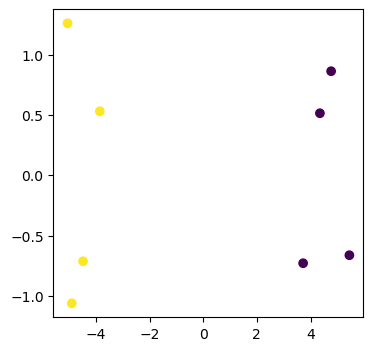

In [39]:
# Plotando essa transformação graficamente
fig, ax = plt.subplots(figsize=(4,4))

ax.scatter(pca.transform(X_dados2)[:,0],pca.transform(X_dados2)[:,1],c=dados.target)

plt.show()

- **Utilizando o PCA para visualizar o dataset iris**
    - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

In [40]:
# Importando o dataset iris
from sklearn.datasets import load_iris
X,y = load_iris(return_X_y=True,as_frame=True)

In [41]:
# Utilizando o PCA
pca = PCA(n_components=2).fit(X)

In [47]:
# Verificando o resultado da transformação
pca.transform(X)[:5]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451]])

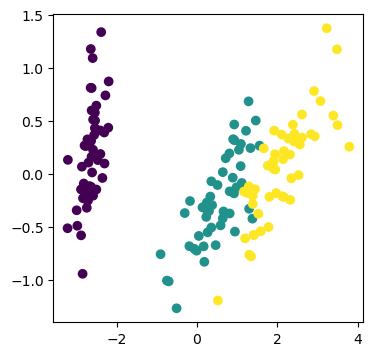

In [48]:
# Visualizando graficamente
fig, ax = plt.subplots(figsize=(4,4))

ax.scatter(pca.transform(X)[:,0],pca.transform(X)[:,1],c=y)

plt.show()

In [51]:
# Verificando o quanto o PCA consegue explicar da variação dos nossos dados
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [52]:
# Visualizando os componentes
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [53]:
# E visualizando a importância de cada variável em cada um dos componentes
abs(pca.components_)

array([[0.36138659, 0.08452251, 0.85667061, 0.3582892 ],
       [0.65658877, 0.73016143, 0.17337266, 0.07548102]])